In [51]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pylab as plt

In [36]:

data = pd.read_json('logins.json', dtype=True)

data.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [38]:
## check dtypes

data.dtypes
#convert to datetime
data['login_time'] = data['login_time'].apply(pd.to_datetime)

data.dtypes

login_time    datetime64[ns]
dtype: object

In [91]:
##resample to 15 min intervals
data.index = data['login_time'] ## copy to index for resampling
## other 
data_counts = data['login_time'].resample('15min').count()

##reformat
data_counts = pd.DataFrame(data_counts)
data_counts.columns = ['num_login']
data_counts.reset_index(inplace=True)

data_counts.head()

,login_time,num_login
0,1970-01-01 20:00:00,2
1,1970-01-01 20:15:00,6
2,1970-01-01 20:30:00,9
3,1970-01-01 20:45:00,7
4,1970-01-01 21:00:00,1


In [92]:
### how many 15 min have zero log ins? 

data_counts['num_login'].value_counts().sort_values()

### none, but several with only 1 login

num_login
66      1
48      1
73      1
51      1
55      1
     ... 
1     638
5     658
3     703
4     706
2     726
Name: count, Length: 62, dtype: int64

<Axes: xlabel='num_login', ylabel='Count'>

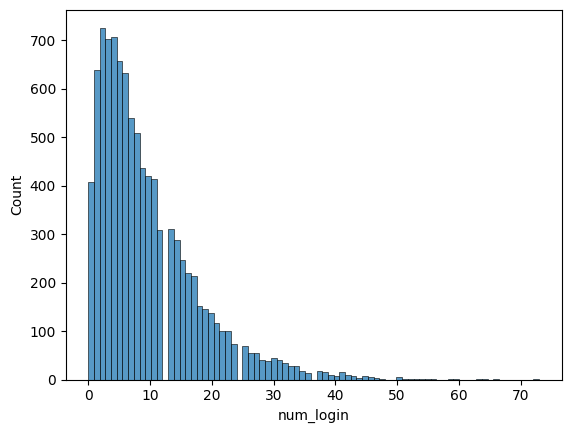

In [116]:
##missing or outliers? 
sns.histplot(data_counts, x='num_login')

##weird gaps at roughly 12, 24, and 36 logins - sorta weird since data is otherwise almost continuos. 
## Something to look out for but not sure I have sufficient data to investigate further. 

(array([  0.,  14.,  31.,  45.,  59.,  73.,  90., 104.]),
 [Text(0.0, 0, '1970-01-01'),
  Text(14.0, 0, '1970-01-15'),
  Text(31.0, 0, '1970-02-01'),
  Text(45.0, 0, '1970-02-15'),
  Text(59.0, 0, '1970-03-01'),
  Text(73.0, 0, '1970-03-15'),
  Text(90.0, 0, '1970-04-01'),
  Text(104.0, 0, '1970-04-15')])

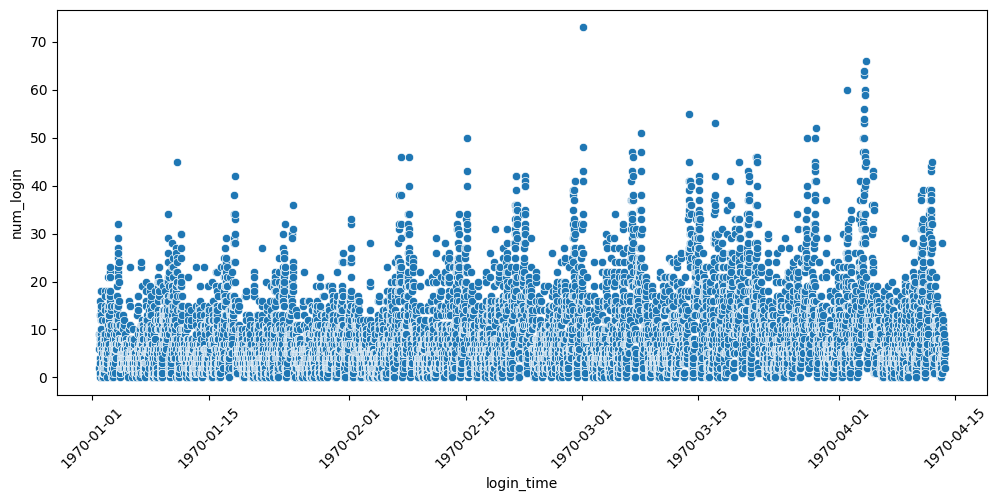

In [94]:
### visualize count data
f, ax = plt.subplots(1, 1, figsize=(12, 5))
sns.scatterplot(data_counts, x='login_time', y='num_login')
plt.xticks(rotation=45)
## roughly weekly peak of logins... what day of the week? 

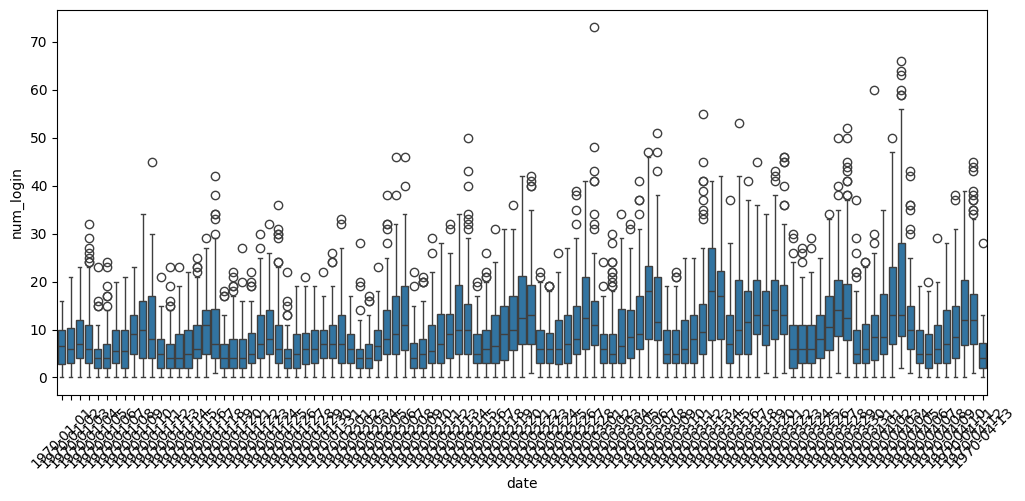

In [128]:
## day of the month? 
f, ax = plt.subplots(1, 1, figsize=(12, 5))
data_counts['date'] = data_counts['login_time'].dt.date
sns.boxplot(data=data_counts, x='date', y='num_login', ax=ax)
plt.xticks(rotation=45)
plt.show()
 ### similar trend to scatter plot

<Axes: xlabel='day_week', ylabel='num_login'>

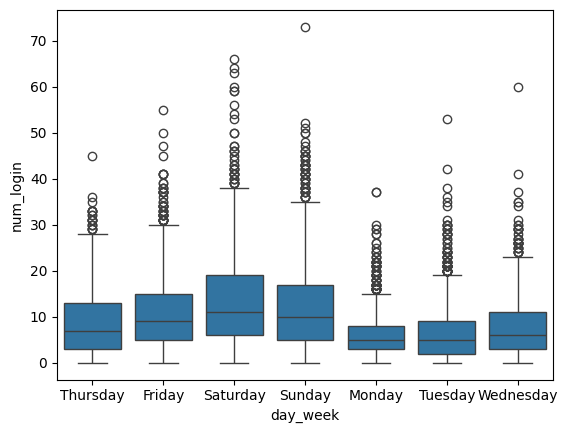

In [114]:
## is there a day of week bias? 
data_counts['day_week'] = data_counts['login_time'].dt.day_name()

sns.boxplot(data=data_counts, x='day_week', y='num_login')
## A: more logins on the weekend

<Axes: xlabel='hour', ylabel='num_login'>

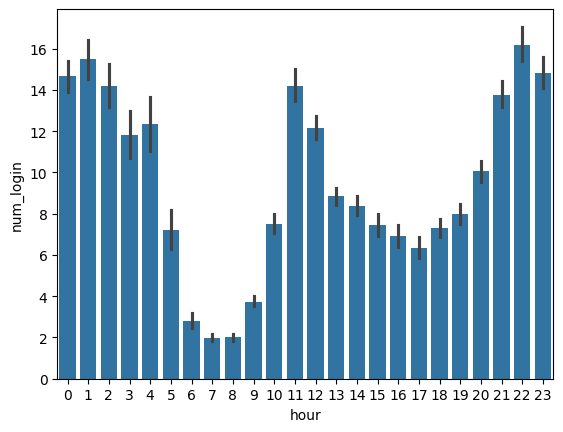

In [118]:
## time of day?
data_counts['hour'] = data_counts['login_time'].dt.hour
sns.barplot(data=data_counts, x='hour', y='num_login')
 ### more logins at lunch, and in the late evening and overnight

<Axes: xlabel='hour', ylabel='num_login'>

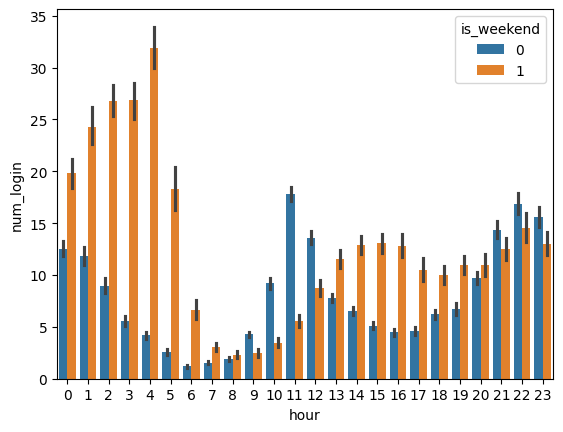

In [121]:
## Q: does daily cycle change for weekend/weekday? 

data_counts['is_weekend'] = 0
data_counts.loc[data_counts['day_week'].isin(['Saturday', 'Sunday']), 'is_weekend'] = 1
sns.barplot(data=data_counts, x='hour', y='num_login', hue='is_weekend')
 ### weekend afternoons generally drive afternoon logins, while lunchtime logins primarily occur during the week.
## weekend is just classified as Sat/Sun, might get slightly clearer trends if weekend was defined as fri evening to sunday evening. 

## Summary

1. weekly login peaks on weekends
2. daily patterns of weekday/weekend logins align with leasure time. eg lunch during week, afternoons on weekends.
3. lots of weekend log in during early hours
4. No apparent missing data, but one odd signal, no 15 min intervals with ~12, 24, or 36 logins. 